In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

sample = pd.read_csv('data//preprocessed//concat.csv', index_col=0)
sample['transcript'] = sample['transcript'] + ' '
sample.dropna(axis=0, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\preprocessed\\concat.csv'

Loading dataset...
done in 0.001s.
Extracting tf features for LDA...
done in 69.970s.
Fitting LDA models with tf features, n_features=1000...
done in 65.363s.


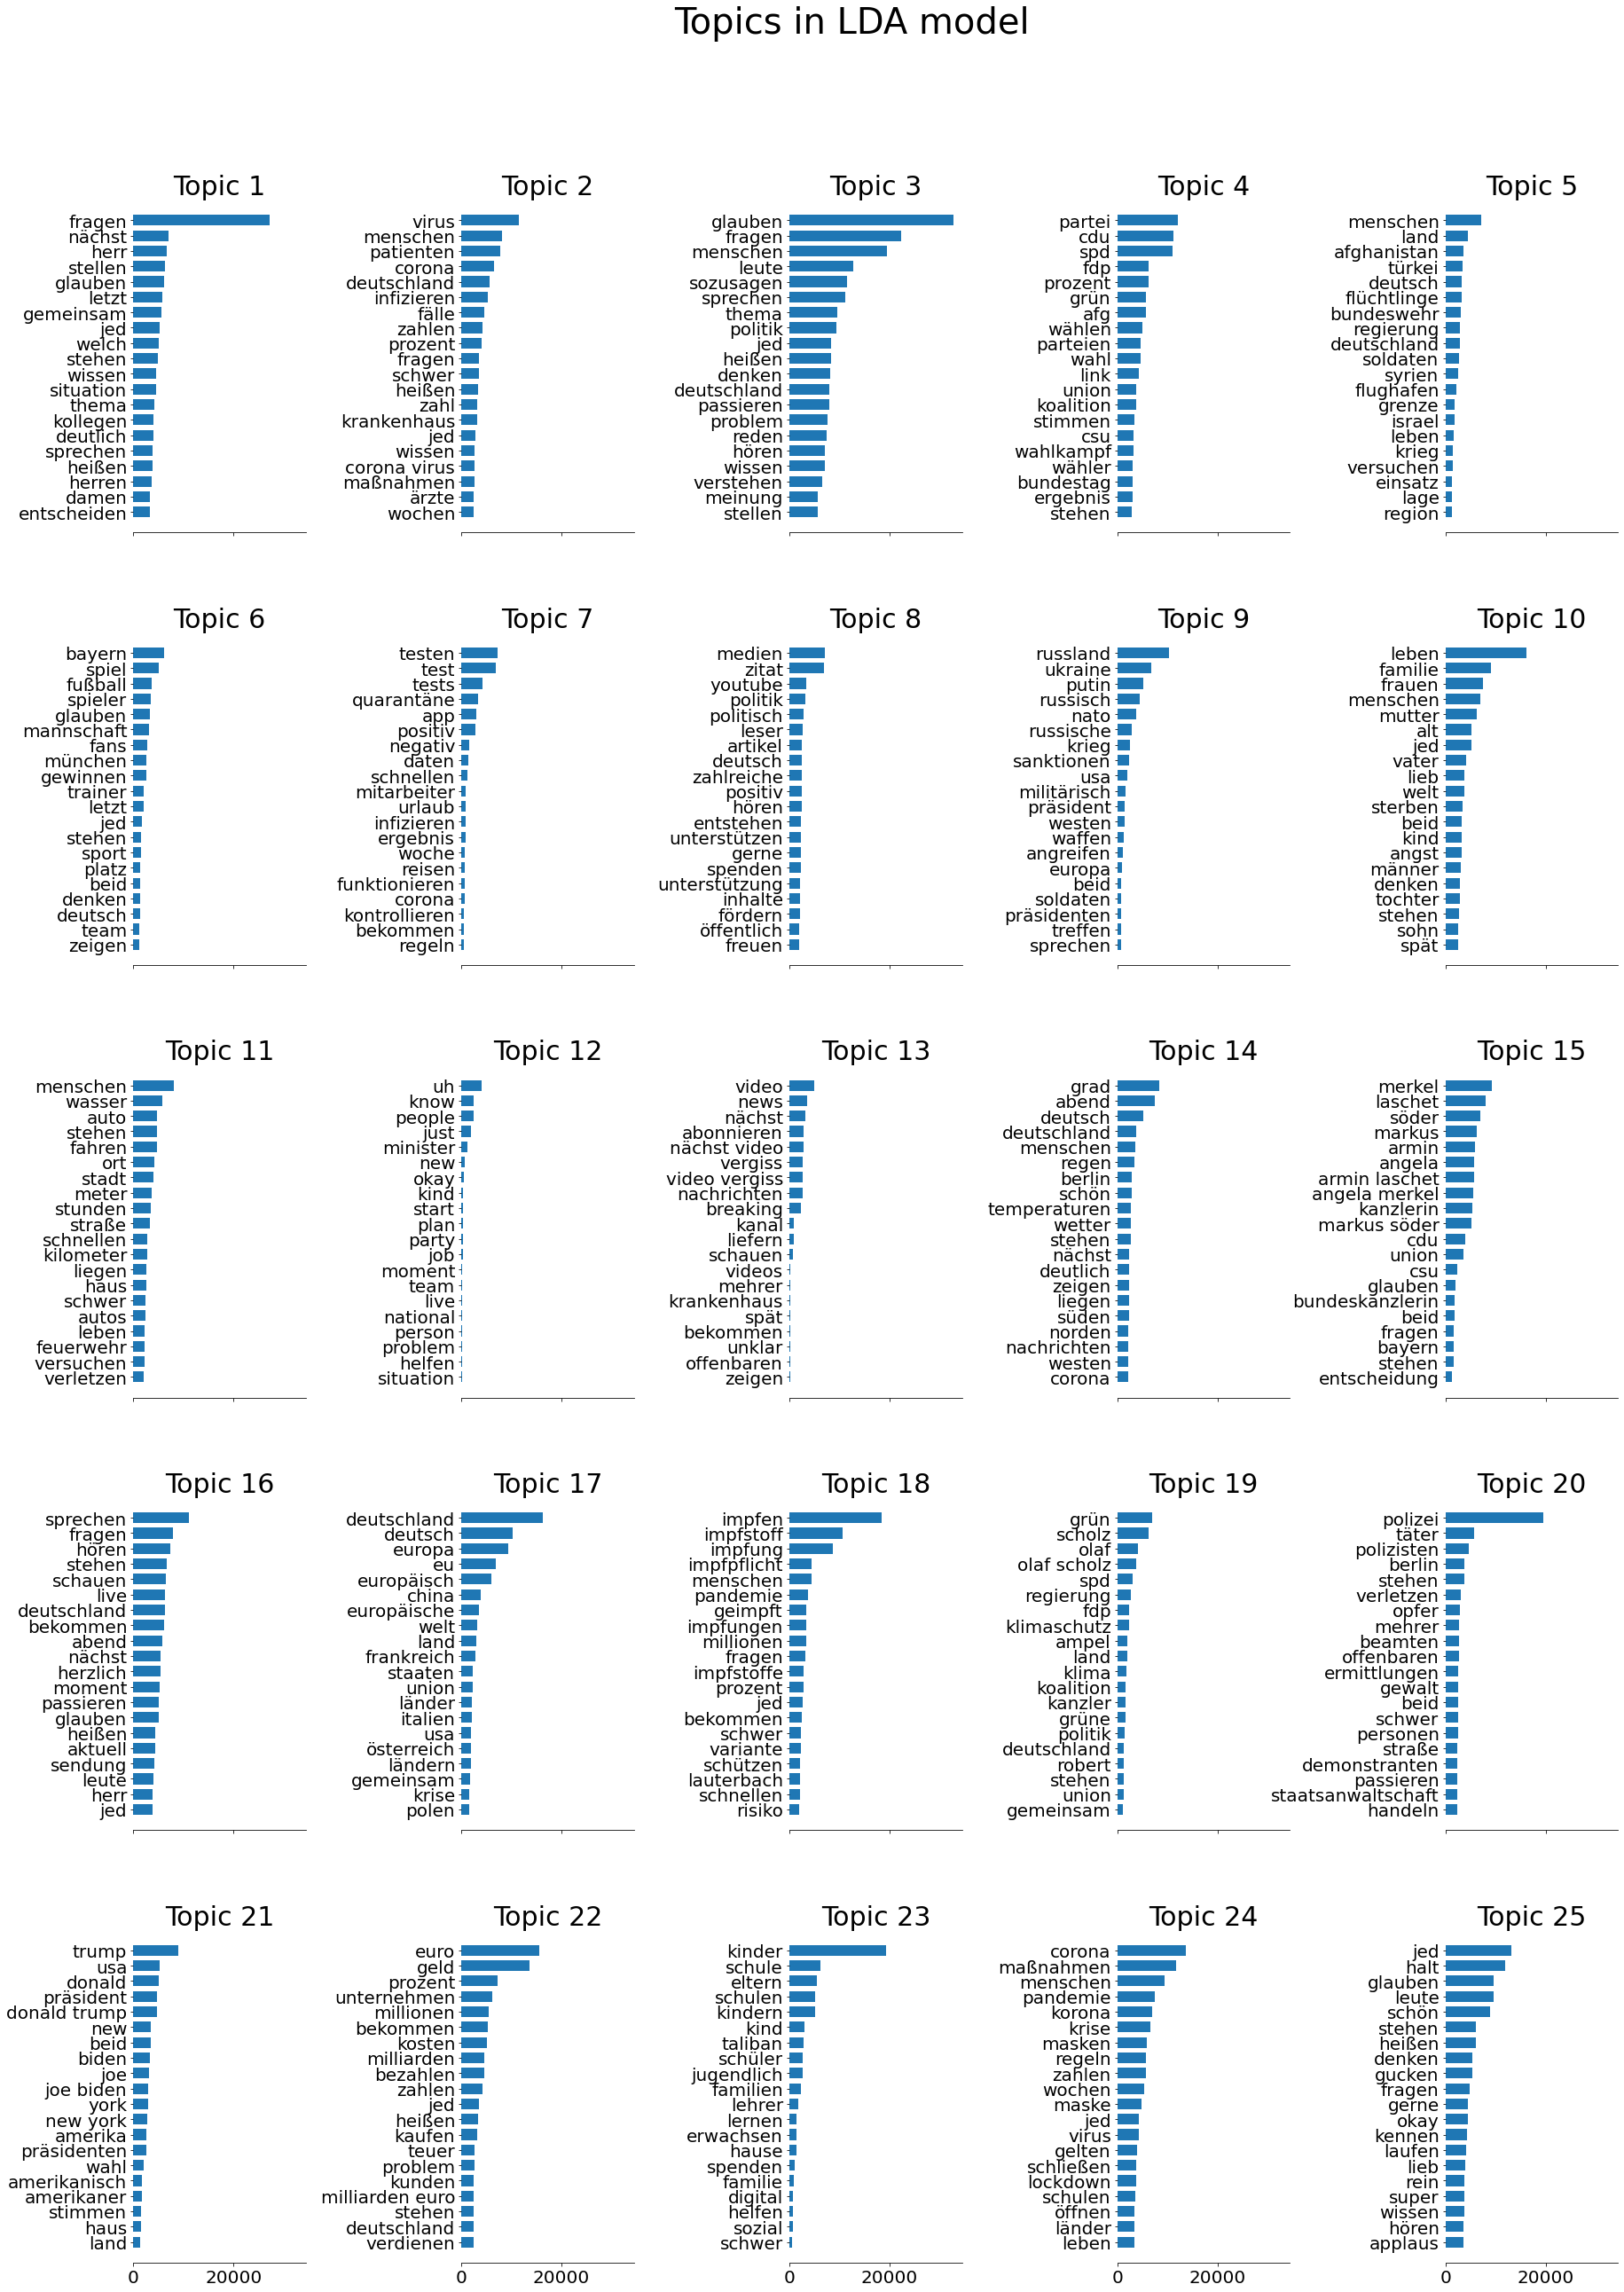

In [3]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

n_features = 1000
n_components = 25
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 5, figsize=(30, 38), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

print("Loading dataset...")
t0 = time()
data = sample['transcript'].tolist()
data_samples = data
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.9, min_df=10, max_features=n_features, stop_words='english', ngram_range=(1,2)
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print(
    "Fitting LDA models with tf features, n_features=%d..."
    % (n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=10,
    learning_method="online",
    learning_offset=45.0,
    learning_decay=0.5,
    random_state=0,
    n_jobs=-1
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [3]:
# Define Search Param
search_params = {'n_components': [25], 'learning_decay': [.5], 'learning_offset':[40.0, 45.0, 50.0]}

# Init the Model
lda = LatentDirichletAllocation(
    max_iter=10,
    learning_method="online",
    random_state=0,
    n_jobs=-1
)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, verbose=3)

# Do the Grid Search
model.fit(tf)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END learning_decay=0.5, learning_offset=40.0, n_components=25;, score=-7911364.824 total time=  46.9s
[CV 2/5] END learning_decay=0.5, learning_offset=40.0, n_components=25;, score=-7659295.324 total time=  47.4s
[CV 3/5] END learning_decay=0.5, learning_offset=40.0, n_components=25;, score=-7969947.127 total time=  48.7s
[CV 4/5] END learning_decay=0.5, learning_offset=40.0, n_components=25;, score=-7982538.663 total time=  47.7s
[CV 5/5] END learning_decay=0.5, learning_offset=40.0, n_components=25;, score=-8074076.239 total time=  47.2s
[CV 1/5] END learning_decay=0.5, learning_offset=45.0, n_components=25;, score=-7911233.281 total time=  47.8s
[CV 2/5] END learning_decay=0.5, learning_offset=45.0, n_components=25;, score=-7658192.767 total time=  47.7s
[CV 3/5] END learning_decay=0.5, learning_offset=45.0, n_components=25;, score=-7969155.239 total time=  48.4s
[CV 4/5] END learning_decay=0.5, learning_offset=45.

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_jobs=-1, random_state=0),
             param_grid={'learning_decay': [0.5],
                         'learning_offset': [40.0, 45.0, 50.0],
                         'n_components': [25]},
             verbose=3)

In [4]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.5, 'learning_offset': 45.0, 'n_components': 25}
Best Log Likelihood Score:  -7918462.9442712115
Model Perplexity:  549.6367186007102


In [8]:
topic_dict = {
    0: 'Misc1',
    1: 'COVID-19',
    2: 'Misc2',
    3: 'Parteienpolitik',
    4: 'International',
    5: 'Fußball',
    6: 'COVID-19 Tests',
    7: 'Medien',
    8: 'Ukrainekonflikt',
    9: 'Familie',
    10: 'Verkehr',
    11: 'Englisch',
    12: 'Videos',
    13: 'Wetter',
    14: 'CDU/CSU',
    15: 'Moderation',
    16: 'Europa',
    17: 'Impfung',
    18: 'Ampelkoalition',
    19: 'Recht',
    20: 'Präsidentschaftswahl',
    21: 'Wirtschaft',
    22: 'Schule',
    23: 'COVID-19 Maßnahmen',
    24: 'Misc3',
}

In [6]:
best_lda_model = lda

In [11]:
df = pd.read_csv('data\\samples\\sample300.csv', index_col=0)
df.dropna(inplace=True)
df_vectorized = tf_vectorizer.transform(df['transcript'].to_list())
lda_output = pd.DataFrame(best_lda_model.transform(df_vectorized))
lda_output['dominant topic'] = np.argmax(lda_output.values, axis=1)
lda_output['id'] = df['id'].to_list()
lda_output.set_index('id')


test = df.merge(lda_output, how='outer', on='id')
test['dominant topic'] = test['dominant topic'].apply(lambda row: topic_dict[row])

In [14]:
test['dominant topic'].value_counts()

Medien                  282
Misc2                   196
Wetter                  115
Parteienpolitik          98
Misc3                    93
Familie                  92
Wirtschaft               76
Verkehr                  71
Recht                    70
Misc1                    58
Fußball                  41
Moderation               39
COVID-19                 35
COVID-19 Maßnahmen       33
International            32
Ukrainekonflikt          30
Impfung                  28
Englisch                 27
Präsidentschaftswahl     22
Europa                   17
Videos                   13
CDU/CSU                  13
Schule                    9
Ampelkoalition            4
COVID-19 Tests            2
Name: dominant topic, dtype: int64

In [15]:
test.to_csv('data\\labeled300.csv')